In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import warnings
import model_report as mr
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
file_info = "C:\\Users\\blgai\\OneDrive\\Documents\\School\\SMU\\Courses\\Fall 2021\\Capstone A\Data\\cleaned_combined_key_words_v1.csv"
df = pd.read_csv(file_info, sep='\t')

In [3]:
df.head()

,url,code,category,language,title,summary,key_words,content,combined,nouns,compounds,comp_nouns,flat_comp_nouns,clean_comp_nouns,clean_combined,clean_key_words
0,*://BLAZINHERB.CA,200,dr,en,Blazin Herb,The Diamond High Crew,"('blazin herb', 'high club', 'edibles concentr...",Blazin Herb THC Edibles Concentrates Flower/bu...,Blazin Herb The Diamond High Crew Blazin herb ...,"[('Blazin', 0, 6, 'PROPN'), ('Herb', 7, 11, 'P...","[('Blazin Herb', 0, 11, 'COMPOUND'), ('Diamond...","{'Read', 'Picks', 'DIAMOND', 'bud', 'THC', 'So...","{'Read', 'Picks', 'DIAMOND', 'bud', 'THC', 'So...",read picks diamond bud thc social sleep club r...,blazin herb diamond high crew blazin herb blaz...,blazin herb high club edible concentrate flowe...
1,*://THEHONEYPOTSTORE.CA,200,dr,en,The Honey Pot Cannabis and Medical Marijuana p...,"The Honey Pot Hamilton Ontario, provides canna...","('honey pot', 'gift certificate', 'medical mar...",The Honey Pot Home About Us F.A.Q.'s About The...,The Honey Pot Cannabis and Medical Marijuana p...,"[('Honey', 4, 9, 'PROPN'), ('Pot', 10, 13, 'PR...","[('Honey Pot Cannabis', 4, 22, 'COMPOUND'), ('...","{'appetite', 'Stress', 'Muscle', 'Hepatitis C'...","{'appetite', 'Stress', 'Muscle', 'Hepatitis C'...",appetite stress muscle hepatitis c hamilton hi...,honey pot cannabis medical marijuana product s...,honey pot gift certificate medical marijuana h...
2,*://AMANTE.CA,200,dr,en,Amante Organics - Licensed Certified Organic C...,np-template-header-footer-from-plugin,"('cannabis producer', 'certified organic', 'pr...",Amante Organics LOCAL | ORGANIC | SUSTAINABLE ...,Amante Organics - Licensed Certified Organic C...,"[('Amante', 0, 6, 'PROPN'), ('Organics', 7, 15...","[('Amante Organics -', 0, 17, 'COMPOUND'), ('O...","{'nations', 'Rights Reserved', ""a'mante"", 'Lic...","{'nations', 'Rights Reserved', ""a'mante"", 'Lic...",nation rights reserved amante licensed np head...,amante organics licensed certified organic can...,cannabis producer certify organic producer alb...
3,*://CANNAFLY.CA,200,dr,en,Cannafly,Cannafly,"('minimum order', 'view detail', 'hybrid view'...",Vancouver's Premium Mobile Medicinal Cannabis ...,"Cannafly Cannafly Marijuana, cannabis, medical...","[('Cannafly', 0, 8, 'PROPN'), ('Cannafly', 9, ...","[('marijuana legalization', 70, 92, 'COMPOUND'...","{'chilliwack', 'Connoisseurs', 'THC', 'industr...","{'chilliwack', 'Connoisseurs', 'THC', 'industr...",chilliwack connoisseurs thc industry death bub...,cannafly cannafly marijuana cannabis medical m...,minimum order view detail hybrid view hope min...
4,*://GRON.VC,200,dr,en,Grøn Ventures,We are backing businesses and brands with pote...,"('grn ventures', 'back business', 'potential m...","GRØN VENTURES 4675 MacArthur Ct, 15th Floor, N...",Grøn Ventures We are backing businesses and br...,"[('Grøn', 0, 4, 'PROPN'), ('Ventures', 5, 13, ...","[('Grøn Ventures', 0, 13, 'COMPOUND'), ('marke...","{'marijuana', 'Beach', 'Newport', 'ventures', ...","{'marijuana', 'Beach', 'Newport', 'ventures', ...",marijuana beach newport venture ct ventures ma...,grn ventures back business brand potential mar...,grn venture back business potential market lea...


In [4]:
df.groupby(df.category).size()

category
bu    11731
dr     1595
ed     3894
mk     8775
os     6789
sp     2535
sx     6557
dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
#get 10% holdout set
train_corpus, holdout_corpus, train_label, holdout_label = train_test_split(df['clean_key_words'], 
                                                                           df['category'],
                                                                           test_size=.10,random_state=1234)

#get 80% train and 20% test sets
train_corpus, test_corpus, train_label, test_label = train_test_split(train_corpus,
                                                                      train_label,
                                                                      test_size=.2225,random_state=1234) #.9 * .2225 = .20

train_corpus.shape, test_corpus.shape, holdout_corpus.shape

((29302,), (8386,), (4188,))

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

#build BOW features on train corpus
tv = TfidfVectorizer(use_idf=True, min_df=25,max_df=.9, norm="l2",smooth_idf=True)
tv_train_features = tv.fit_transform(train_corpus)
#transform test corpus into features
tv_test_features = tv.transform(test_corpus)
#transform holdout corpus into features
tv_holdout_features = tv.transform(holdout_corpus)

print('TFIDF model:> Train features shape:',tv_train_features.shape,'Test features shape:',tv_test_features.shape,'Holdout features shape:',tv_holdout_features.shape)

TFIDF model:> Train features shape: (29302, 2940) Test features shape: (8386, 2940) Holdout features shape: (4188, 2940)


In [7]:
#Let's find the top important features and analyze them

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_opt=SelectKBest(chi2, k=2000)
tv_train_features_trimmed = X_opt.fit_transform(tv_train_features, train_label)
tv_train_features_trimmed.shape

(29302, 2000)

In [8]:
#create a data frame that includes all features and whether or not they are deemed important by feature_selection
feat_imp = pd.DataFrame(list(zip(tv.get_feature_names(),X_opt.get_support().tolist())),columns = ['Features','Important'])
feat_imp[feat_imp.Important == True]

,Features,Important
2,abroad,True
6,academic,True
7,academy,True
8,accept,True
9,access,True
...,...,...
2930,yield,True
2932,york,True
2933,young,True
2934,youth,True


In [9]:
#Now we can grab the important features so that we can select only the important features from the sparse matrix created by TfidfVectorizer
imp_Feats_array = np.array(feat_imp[feat_imp.Important == True].index)

In [10]:
#Now we can pull only the important features out of the original train, test, and holdout matrices
tv_train_features_sub = tv_train_features[:,imp_Feats_array]
tv_test_features_sub = tv_test_features[:,imp_Feats_array]
tv_holdout_features_sub = tv_holdout_features[:,imp_Feats_array]

#Examine the new shapes of the sub-selected features
print('TFIDF model:> Train features shape:',tv_train_features_sub.shape,'Test features shape:',tv_test_features_sub.shape,'Holdout features shape:',tv_holdout_features_sub.shape)

TFIDF model:> Train features shape: (29302, 2000) Test features shape: (8386, 2000) Holdout features shape: (4188, 2000)


In [11]:
%%time

from sklearn import svm
clf = svm.SVC(kernel='linear', probability=True, C=1.0, class_weight={'dr':8,'sx':10},random_state=1234)
clf.fit(tv_train_features_sub,train_label)

Wall time: 3min 44s


SVC(class_weight={'dr': 8, 'sx': 10}, kernel='linear', probability=True,
    random_state=1234)

In [12]:
svm_tfidf_test_score = clf.score(tv_test_features_sub,test_label)
print('Test Accuracy:',svm_tfidf_test_score)

Test Accuracy: 0.7644884331027904


In [13]:
import model_evaluation_utils as meu
svm_predictions = clf.predict(tv_test_features_sub)
meu.get_metrics(true_labels=test_label,predicted_labels=svm_predictions)

Accuracy: 0.7645
Precision: 0.7654
Recall: 0.7645
F1 Score: 0.7636


In [14]:
unique_classes = list(set(test_label))
meu.display_classification_report(true_labels=test_label,predicted_labels=svm_predictions,classes=unique_classes)

              precision    recall  f1-score   support

          dr       0.87      0.90      0.88       307
          os       0.73      0.66      0.69      1393
          sx       0.94      0.97      0.95      1345
          ed       0.82      0.70      0.76       783
          bu       0.74      0.80      0.77      2355
          mk       0.64      0.65      0.64      1709
          sp       0.81      0.73      0.77       494

    accuracy                           0.76      8386
   macro avg       0.79      0.77      0.78      8386
weighted avg       0.77      0.76      0.76      8386



Confusion matrix, without normalization
[[ 919   25   17   20  236   18  158]
 [  17  552    5   21   54   12  122]
 [  11    0  275    1    4    6   10]
 [  23   24    4  360   45   11   27]
 [ 158   30    6   34 1117   19  345]
 [   8    4    1    0   14 1305   13]
 [ 118   37    9    6  285   17 1883]]


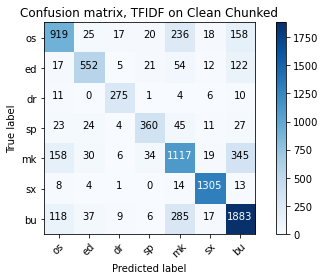

In [15]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(test_label,svm_predictions,labels=['os','ed','dr','sp','mk','sx','bu'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
mr.plot_confusion_matrix(cnf_matrix, classes=['os','ed','dr','sp','mk','sx','bu'],
                      title='Confusion matrix, TFIDF on Clean Chunked')

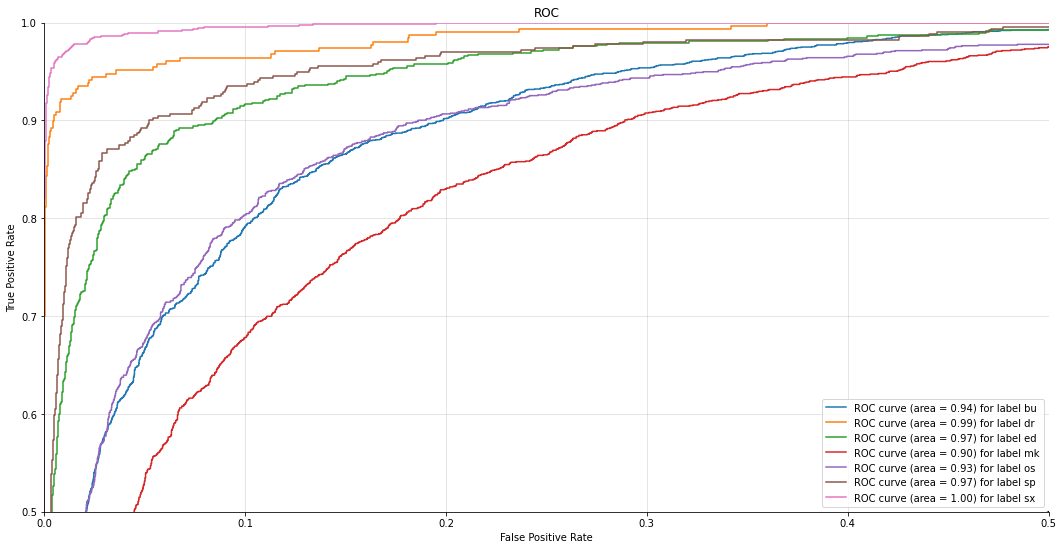

In [16]:
y_proba = clf.predict_proba(tv_test_features_sub)

labels_dict = dict(zip(df.category,df.category))
target_names = sorted(list(labels_dict.values()))

mr.plot_roc_curve(labels=test_label, predictions=y_proba, x_lim=[0.0,0.5], y_lim=[0.5,1.0], target_names=target_names)

In [17]:
df_test_results = pd.DataFrame(list(zip(test_corpus,test_label,svm_predictions, y_proba)),columns = ['terms','category','predicted_label','probability'])
df_test_results['match'] = np.where(df_test_results['category']==df_test_results['predicted_label'],1,0)

In [18]:
rpt = mr.generate_report(df_test_results)
rpt

{'totalSamples': 8386,
 'overallAccuracy': 0.7644884331027904,
 'byCategory': {'sx': {'totalSamples': 1345, 'accuracy': 0.9702602230483272},
  'dr': {'totalSamples': 307, 'accuracy': 0.8957654723127035},
  'bu': {'totalSamples': 2355, 'accuracy': 0.7995753715498939},
  'sp': {'totalSamples': 494, 'accuracy': 0.728744939271255},
  'ed': {'totalSamples': 783, 'accuracy': 0.7049808429118773},
  'os': {'totalSamples': 1393, 'accuracy': 0.659727207465901},
  'mk': {'totalSamples': 1709, 'accuracy': 0.6535985956699825}}}

In [19]:
#here we can see that the misclassifications of sex equate to the counts in the confusion matrix
df_test_results[(df_test_results.predicted_label == 'sx') & (df_test_results.match == 0)].groupby('category').size()

category
bu    17
dr     6
ed    12
mk    19
os    18
sp    11
dtype: int64

In [20]:
#let's look at some of the misclassifications to get an idea of why they were misclassified
pd.set_option('display.max_colwidth', None)
df_test_results[(df_test_results.predicted_label == 'sx') & (df_test_results.match == 0)]

,terms,category,predicted_label,probability,match
212,michael kor save michael kor wallet wallet save gia grayson leigh selma tote bedford return friendly copyright www friendly link,os,sx,"[0.018972026188006672, 0.015200582474040306, 0.023868870422456428, 0.05046019790007967, 0.5157521292701844, 0.042084725586757306, 0.3336614681584748]",0
281,share twitter twitter share national holiday holiday vacation offer accredit capetown beauty casauno acrylic include breakfast join night flamboyant,mk,sx,"[0.2203293154986314, 0.004380247192669392, 0.1367958567917935, 0.3083543064846232, 0.060097773428089384, 0.07381643017215177, 0.19622607043204116]",0
332,sex shop shop gravity market carry gold package click submit evaluation form form gold gravity official ultimate sex drug video,os,sx,"[0.029188260914235264, 0.04684412563778644, 0.008624707396770697, 0.05279821807022395, 0.2870703903832884, 0.08260898653350196, 0.49286531106419296]",0
371,prediction term term view continue read winner continue ipl match match hyderabad august july september august technology lockup tag april,sp,sx,"[0.17963222125446576, 0.012461927580164362, 0.20250729084552646, 0.07479626230205634, 0.03924126315983829, 0.3270710404829166, 0.16428999437503244]",0
385,mma fighter clothing mma ufc walkout hoodie headguard anderson silva antonio rogerio forr griffin july june september august phil davis,sp,sx,"[0.22124626344860265, 0.09563037092778734, 0.08474129822748645, 0.10496665602043792, 0.10659913638427604, 0.22379495597754848, 0.16302131901386094]",0
...,...,...,...,...,...
7868,play passion carovigno brindisi spinelli luca luca infante summerbasketcamp php php httpwww httpwww mediturvillage basket pallacanestro camp estivo,sp,sx,"[0.03518153904246292, 0.0020886103679668014, 0.01143039300845912, 0.10940163229518109, 0.3702062530175501, 0.21863245274808987, 0.2530591195202898]",0
7901,home home ibm skin skin web controller navigation mashup enabler web content viewer jsr collaboration social dynamische vernetzung startseite zjhrgkgoailrfss,bu,sx,"[0.34645031726435394, 0.024430990830939373, 0.05236779970690571, 0.10396725539757692, 0.15601241480185887, 0.00794418746003883, 0.30882703453832594]",0
8115,hour ago post comment student run year mental health night mac language buddy textbook poli week video discussion post,ed,sx,"[0.00466966291181794, 0.00042081658746793207, 0.03971864914941792, 0.0062645490822238695, 0.0016761028128729836, 0.05915878870645183, 0.8880914307497476]",0
8264,notice undefined distribution contact eval code module php tan opalanie opalanie beauty wybor jezyka polska latvija index termheade country world,bu,sx,"[0.08381083603927306, 0.006108208207023292, 0.014739338383032248, 0.10875889913492788, 0.07490170250529739, 0.016867901021923506, 0.694813114708523]",0


# train svm on clean_comp_nouns

In [21]:
from sklearn.model_selection import train_test_split
#get 10% holdout set
train_corpus_ccn, holdout_corpus_ccn, train_label, holdout_label = train_test_split(df['clean_comp_nouns'], 
                                                                           df['category'],
                                                                           test_size=.10,random_state=1234)

#get 80% train and 20% test sets
train_corpus_ccn, test_corpus_ccn, train_label, test_label = train_test_split(train_corpus_ccn,
                                                                      train_label,
                                                                      test_size=.2225,random_state=1234) #.9 * .2225 = .20

train_corpus_ccn.shape, test_corpus_ccn.shape, holdout_corpus_ccn.shape

((29302,), (8386,), (4188,))

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

#build BOW features on train corpus
tv = TfidfVectorizer(use_idf=True, min_df=25,max_df=.9, norm="l2",smooth_idf=True)
tv_train_features_ccn = tv.fit_transform(train_corpus_ccn)
#transform test corpus into features
tv_test_features_ccn = tv.transform(test_corpus_ccn)
#transform holdout corpus into features
tv_holdout_features_ccn = tv.transform(holdout_corpus_ccn)

print('TFIDF model:> Train features shape:',tv_train_features_ccn.shape,'Test features shape:',tv_test_features_ccn.shape,'Holdout features shape:',tv_holdout_features_ccn.shape)

TFIDF model:> Train features shape: (29302, 17587) Test features shape: (8386, 17587) Holdout features shape: (4188, 17587)


In [23]:
#Let's find the top important features and analyze them

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_opt=SelectKBest(chi2, k=4100)
tv_train_features_trimmed_ccn = X_opt.fit_transform(tv_train_features_ccn, train_label)
tv_train_features_trimmed_ccn.shape

(29302, 4100)

In [24]:
#create a data frame that includes all features and whether or not they are deemed important by feature_selection
feat_imp = pd.DataFrame(list(zip(tv.get_feature_names(),X_opt.get_support().tolist())),columns = ['Features','Important'])
#Now we can grab the important features so that we can select only the important features from the sparse matrix created by TfidfVectorizer
imp_Feats_array = np.array(feat_imp[feat_imp.Important == True].index)

In [25]:
#Now we can pull only the important features out of the original train, test, and holdout matrices
tv_train_features_sub_ccn = tv_train_features_ccn[:,imp_Feats_array]
tv_test_features_sub_ccn = tv_test_features_ccn[:,imp_Feats_array]
tv_holdout_features_sub_ccn = tv_holdout_features_ccn[:,imp_Feats_array]

#Examine the new shapes of the sub-selected features
print('TFIDF model:> Train features shape:',tv_train_features_sub_ccn.shape,'Test features shape:',tv_test_features_sub_ccn.shape,'Holdout features shape:',tv_holdout_features_sub_ccn.shape)

TFIDF model:> Train features shape: (29302, 4100) Test features shape: (8386, 4100) Holdout features shape: (4188, 4100)


In [26]:
from sklearn import svm
clf_ccn = svm.SVC(kernel='linear', probability=True, C=1.0, class_weight={'dr':8,'sx':10},random_state=1234)
clf_ccn.fit(tv_train_features_sub_ccn,train_label)

SVC(class_weight={'dr': 8, 'sx': 10}, kernel='linear', probability=True,
    random_state=1234)

In [27]:
svm_ccn_tfidf_test_score = clf_ccn.score(tv_test_features_sub_ccn,test_label)
print('Test Accuracy:',svm_ccn_tfidf_test_score)

Test Accuracy: 0.8637014071070832


In [28]:
import model_evaluation_utils as meu
svm_ccn_predictions = clf_ccn.predict(tv_test_features_sub_ccn)
meu.get_metrics(true_labels=test_label,predicted_labels=svm_ccn_predictions)

Accuracy: 0.8637
Precision: 0.8668
Recall: 0.8637
F1 Score: 0.8645


In [29]:
unique_classes = list(set(test_label))
meu.display_classification_report(true_labels=test_label,predicted_labels=svm_ccn_predictions,classes=unique_classes)

              precision    recall  f1-score   support

          dr       0.98      0.95      0.96       307
          os       0.86      0.78      0.82      1393
          sx       0.99      0.99      0.99      1345
          ed       0.92      0.87      0.90       783
          bu       0.86      0.87      0.86      2355
          mk       0.73      0.80      0.76      1709
          sp       0.91      0.87      0.89       494

    accuracy                           0.86      8386
   macro avg       0.89      0.88      0.88      8386
weighted avg       0.87      0.86      0.86      8386



# Create svm probability training data using keyword and cleaned compound noun models

In [30]:
#get train probabilities
y_train_kw_proba = clf.predict_proba(tv_train_features_sub)
y_train_ccn_proba = clf_ccn.predict_proba(tv_train_features_sub_ccn)
#get test probabilities
y_test_kw_proba = clf.predict_proba(tv_test_features_sub)
y_test_ccn_proba = clf_ccn.predict_proba(tv_test_features_sub_ccn)

In [31]:
#mapping of classes for keyword models in probabilities
clf.classes_

array(['bu', 'dr', 'ed', 'mk', 'os', 'sp', 'sx'], dtype=object)

In [32]:
#mapping of classes for ccn model in prob
clf_ccn.classes_

array(['bu', 'dr', 'ed', 'mk', 'os', 'sp', 'sx'], dtype=object)

In [33]:
#split training probabilities into separate variables
bu_kw_tr,dr_kw_tr,ed_kw_tr,mk_kw_tr,os_kw_tr,sp_kw_tr,sx_kw_tr = zip(*y_train_kw_proba)
bu_ccn_tr,dr_ccn_tr,ed_ccn_tr,mk_ccn_tr,os_ccn_tr,sp_ccn_tr,sx_ccn_tr = zip(*y_train_ccn_proba)

#split test probabilities into separate variables
bu_kw_tst,dr_kw_tst,ed_kw_tst,mk_kw_tst,os_kw_tst,sp_kw_tst,sx_kw_tst = zip(*y_test_kw_proba)
bu_ccn_tst,dr_ccn_tst,ed_ccn_tst,mk_ccn_tst,os_ccn_tst,sp_ccn_tst,sx_ccn_tst = zip(*y_test_ccn_proba)

# Create probability training df

In [34]:
df_train_probs = pd.DataFrame(list(zip(bu_kw_tr,dr_kw_tr,ed_kw_tr,mk_kw_tr,os_kw_tr,sp_kw_tr,sx_kw_tr,bu_ccn_tr,dr_ccn_tr,ed_ccn_tr,mk_ccn_tr,os_ccn_tr,sp_ccn_tr,sx_ccn_tr,train_label)),
                              columns = ['bu_kw_prob','dr_kw_prob','ed_kw_prob','mk_kw_prob','os_kw_prob','sp_kw_prob','sx_kw_prob','bu_ccn_prob','dr_ccn_prob','ed_ccn_prob','mk_ccn_prob','os_ccn_prob','sp_ccn_prob','sx_ccn_prob','category'])
df_train_probs

,bu_kw_prob,dr_kw_prob,ed_kw_prob,mk_kw_prob,os_kw_prob,sp_kw_prob,sx_kw_prob,bu_ccn_prob,dr_ccn_prob,ed_ccn_prob,mk_ccn_prob,os_ccn_prob,sp_ccn_prob,sx_ccn_prob,category
0,7.630141e-01,4.987647e-03,3.698614e-02,1.159004e-01,6.810762e-02,9.098859e-03,1.905209e-03,1.356420e-01,0.005567,3.069385e-01,2.674447e-01,2.570592e-01,2.441288e-02,2.935503e-03,mk
1,6.790771e-01,1.017361e-02,9.149359e-03,1.722177e-01,1.011876e-01,2.365784e-02,4.536867e-03,1.201537e-01,0.000536,2.650723e-03,7.123347e-01,1.618313e-01,2.198764e-03,2.947843e-04,mk
2,1.385694e-01,5.447295e-03,2.166294e-02,6.959304e-01,1.129801e-01,1.309928e-02,1.231065e-02,2.541881e-02,0.001283,1.234979e-02,8.682929e-01,5.631654e-02,3.477934e-02,1.559569e-03,mk
3,1.032916e-01,3.570580e-03,4.135678e-02,7.328696e-01,1.113623e-01,6.880829e-03,6.682892e-04,3.210950e-02,0.000066,3.009986e-04,9.594156e-01,7.696693e-03,3.425794e-04,6.819640e-05,mk
4,3.243637e-01,7.614658e-03,7.590964e-02,3.411048e-01,9.754368e-02,1.514953e-01,1.968103e-03,2.432004e-01,0.001439,1.916225e-03,5.430214e-01,2.078255e-01,1.571416e-03,1.026406e-03,os
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29297,9.266203e-01,6.943202e-05,2.201356e-03,6.345359e-02,7.389824e-03,1.219393e-04,1.435729e-04,9.970480e-01,0.000002,4.054717e-05,2.558101e-03,3.385814e-04,1.237321e-05,1.604548e-07,bu
29298,8.794740e-09,1.652584e-09,2.542114e-09,7.275618e-09,5.402941e-09,2.015046e-09,1.000000e+00,3.516958e-04,0.000917,2.230920e-03,8.672427e-04,4.970262e-04,2.720614e-04,9.948644e-01,sx
29299,1.433208e-08,9.999868e-01,1.285207e-06,1.667319e-06,8.318966e-06,1.430441e-06,4.386415e-07,3.580154e-13,1.000000,2.422649e-08,5.468798e-08,7.556879e-08,1.797631e-08,1.855666e-07,dr
29300,7.536856e-01,9.204601e-04,4.016859e-03,1.708322e-01,5.598032e-02,1.386158e-02,7.029647e-04,7.478736e-01,0.010599,1.480400e-02,1.218618e-01,9.807241e-02,4.212598e-03,2.576321e-03,bu


# Create probability test df

In [35]:
df_test_probs = pd.DataFrame(list(zip(bu_kw_tst,dr_kw_tst,ed_kw_tst,mk_kw_tst,os_kw_tst,sp_kw_tst,sx_kw_tst,bu_ccn_tst,dr_ccn_tst,ed_ccn_tst,mk_ccn_tst,os_ccn_tst,sp_ccn_tst,sx_ccn_tst,test_label)),
                              columns = ['bu_kw_prob','dr_kw_prob','ed_kw_prob','mk_kw_prob','os_kw_prob','sp_kw_prob','sx_kw_prob','bu_ccn_prob','dr_ccn_prob','ed_ccn_prob','mk_ccn_prob','os_ccn_prob','sp_ccn_prob','sx_ccn_prob','category'])
df_test_probs

,bu_kw_prob,dr_kw_prob,ed_kw_prob,mk_kw_prob,os_kw_prob,sp_kw_prob,sx_kw_prob,bu_ccn_prob,dr_ccn_prob,ed_ccn_prob,mk_ccn_prob,os_ccn_prob,sp_ccn_prob,sx_ccn_prob,category
0,9.963382e-08,2.690955e-08,5.939038e-08,1.232002e-07,1.087461e-07,3.968268e-08,1.000000,4.721761e-12,2.808680e-12,4.216967e-12,9.113487e-12,7.094323e-12,3.363506e-12,1.000000e+00,sx
1,7.448138e-14,1.786432e-14,4.407118e-14,6.894339e-14,6.791122e-14,2.096091e-14,1.000000,2.088906e-13,7.865687e-14,1.231975e-13,2.736735e-13,2.939254e-13,1.099646e-13,1.000000e+00,sx
2,8.394415e-02,8.227781e-04,1.104163e-02,3.033933e-01,5.994266e-01,1.225848e-03,0.000146,3.354234e-01,5.342940e-05,7.065421e-04,5.819701e-01,8.117259e-02,6.426692e-04,3.130233e-05,bu
3,2.060900e-01,1.196996e-03,3.181649e-02,7.275754e-01,1.593274e-02,1.700173e-02,0.000387,5.555159e-01,6.279326e-04,1.605180e-02,3.813572e-01,3.559498e-02,9.061724e-03,1.790447e-03,bu
4,1.581631e-01,4.724916e-03,4.545758e-01,2.758358e-01,1.646901e-02,6.436510e-02,0.025866,2.405779e-07,1.351413e-07,9.999977e-01,1.871143e-07,1.521522e-07,1.477604e-06,6.991123e-08,ed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8381,6.308766e-01,5.539229e-04,5.147393e-03,3.312558e-01,3.127990e-02,6.871573e-04,0.000199,5.257536e-01,1.140790e-04,3.365517e-04,4.719062e-01,1.820437e-03,6.077266e-05,8.332329e-06,bu
8382,2.505807e-03,1.859418e-03,2.677259e-04,2.607476e-03,5.841436e-03,4.037083e-04,0.986514,1.099579e-04,5.026625e-04,9.995976e-04,6.477450e-04,1.913351e-04,9.360552e-04,9.966126e-01,sx
8383,4.437778e-02,6.360838e-04,1.420950e-03,1.598051e-01,7.425266e-01,5.077377e-02,0.000460,9.312368e-03,5.996300e-04,2.195000e-03,7.216948e-01,2.469989e-01,1.884496e-02,3.543830e-04,mk
8384,5.249777e-03,6.807320e-04,3.413925e-03,8.399209e-01,1.418906e-01,8.114478e-03,0.000730,8.840614e-03,2.561891e-04,6.058033e-03,9.622624e-01,1.960732e-02,2.320350e-03,6.550883e-04,mk


# train xgboost model on training set probabilities

In [36]:
#set up training data
X_train = df_train_probs[['bu_kw_prob','dr_kw_prob','ed_kw_prob','mk_kw_prob','os_kw_prob','sp_kw_prob','sx_kw_prob','bu_ccn_prob','dr_ccn_prob','ed_ccn_prob','mk_ccn_prob','os_ccn_prob','sp_ccn_prob','sx_ccn_prob']].values
Y_train = df_train_probs[['category']].values
#set up test data
X_test = df_test_probs[['bu_kw_prob','dr_kw_prob','ed_kw_prob','mk_kw_prob','os_kw_prob','sp_kw_prob','sx_kw_prob','bu_ccn_prob','dr_ccn_prob','ed_ccn_prob','mk_ccn_prob','os_ccn_prob','sp_ccn_prob','sx_ccn_prob']].values
Y_test = df_test_probs[['category']].values

In [37]:
print(len(X_train))
print(len(Y_train))
print(len(X_test))
print(len(Y_test))

29302
29302
8386
8386


In [38]:
from xgboost import XGBClassifier
clf_xgb = XGBClassifier(silent=False,
                        scale_pos_weight=1,
                        learning_rate=0.01,
                        colsample_bytree = 0.4,
                        subsample = 0.8,
                        objective='multi:softprob',
                        n_estimators=500,
                        reg_alpha = 0.3,
                        max_depth=4,
                        gamma=1)
clf_xgb.fit(X_train, Y_train)

[22:07:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { scale_pos_weight, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:07:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0.3,
              reg_lambda=1, scale_pos_weight=1, silent=False, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [39]:
xgb_predictions = clf_xgb.predict(X_test)
meu.get_metrics(true_labels=test_label, predicted_labels=xgb_predictions)

Accuracy: 0.8602
Precision: 0.8618
Recall: 0.8602
F1 Score: 0.8608


In [40]:
unique_classes = list(set(test_label))
meu.display_classification_report(true_labels=test_label,predicted_labels=xgb_predictions,classes=unique_classes)

              precision    recall  f1-score   support

          dr       1.00      0.90      0.95       307
          os       0.82      0.80      0.81      1393
          sx       1.00      0.97      0.99      1345
          ed       0.89      0.91      0.90       783
          bu       0.86      0.86      0.86      2355
          mk       0.75      0.77      0.76      1709
          sp       0.88      0.89      0.89       494

    accuracy                           0.86      8386
   macro avg       0.88      0.87      0.88      8386
weighted avg       0.86      0.86      0.86      8386



Confusion matrix, without normalization
[[1121   20    1   13  158    0   80]
 [   8  710    0   11   18    0   36]
 [  22    1  277    0    5    0    2]
 [  13   12    0  442   24    1    2]
 [ 128   20    0   29 1324    0  208]
 [   6    6    0    3   17 1311    2]
 [  70   32    0    5  219    0 2029]]


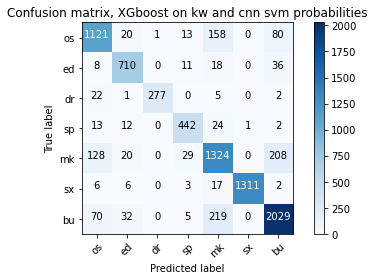

In [41]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(test_label,xgb_predictions,labels=['os','ed','dr','sp','mk','sx','bu'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
mr.plot_confusion_matrix(cnf_matrix, classes=['os','ed','dr','sp','mk','sx','bu'],
                      title='Confusion matrix, XGboost on kw and cnn svm probabilities')

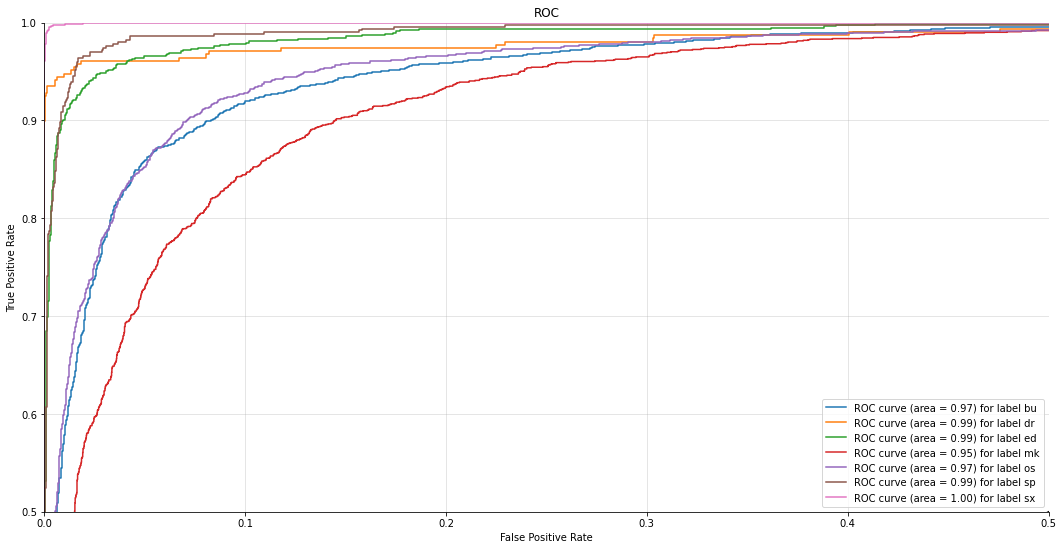

In [42]:
y_proba = clf_xgb.predict_proba(X_test)

labels_dict = dict(zip(df.category,df.category))
target_names = sorted(list(labels_dict.values()))

mr.plot_roc_curve(labels=test_label, predictions=y_proba, x_lim=[0.0,0.5], y_lim=[0.5,1.0], target_names=target_names)

In [43]:
df_test_results = pd.DataFrame(list(zip(test_corpus,test_label,xgb_predictions, y_proba)),columns = ['terms','category','predicted_label','probability'])
df_test_results['match'] = np.where(df_test_results['category']==df_test_results['predicted_label'],1,0)

In [44]:
rpt = mr.generate_report(df_test_results)
rpt

{'totalSamples': 8386,
 'overallAccuracy': 0.8602432625804913,
 'byCategory': {'sx': {'totalSamples': 1345, 'accuracy': 0.9747211895910781},
  'ed': {'totalSamples': 783, 'accuracy': 0.9067688378033205},
  'dr': {'totalSamples': 307, 'accuracy': 0.9022801302931596},
  'sp': {'totalSamples': 494, 'accuracy': 0.8947368421052632},
  'bu': {'totalSamples': 2355, 'accuracy': 0.8615711252653928},
  'os': {'totalSamples': 1393, 'accuracy': 0.8047379755922469},
  'mk': {'totalSamples': 1709, 'accuracy': 0.7747220596840257}}}

In [45]:
#pickle the key words model
import pickle

filename = 'svm_keywords_v1.sav'
pickle.dump(clf,open(filename,'wb'))